In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [16]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]

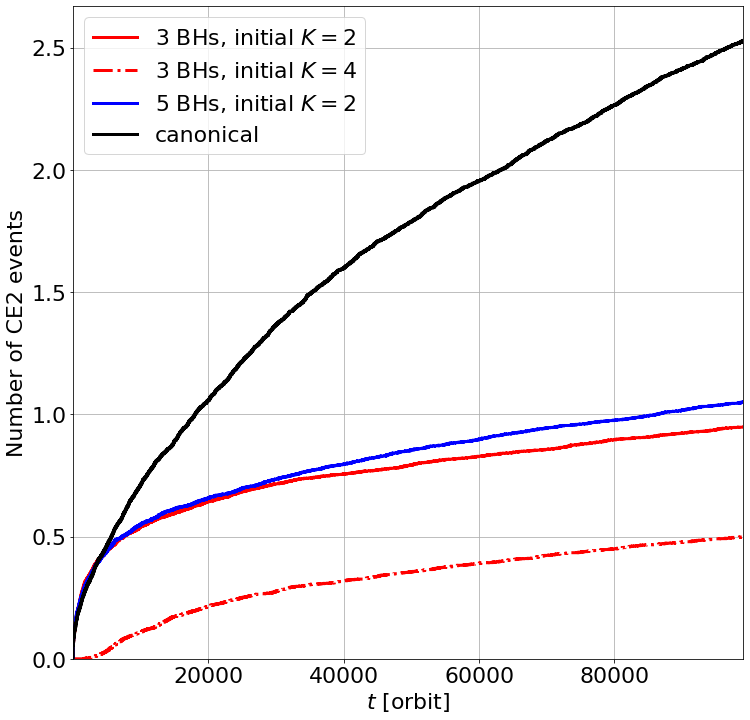

In [18]:
### 
##  Read the data for damping runs
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH

can_CE0 = limit_rc( np.load('./data/can_CE0-2000.npy'), rc)

p3k2 = np.load('./data/NBH3-2K.npy')
p3k4 = np.load('./data/NBH3-4K.npy')
p5k2 = np.load('./data/NBH5-2K.npy')
p5k4 = np.load('./data/NBH5-4K.npy')



##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$t$ [orbit]')
axs.set_ylabel(r'Number of CE2 events')
axs.set_xlim([1e0,0.99e5])

# parameters of the plot

nbins = 4001
t_bins = np.linspace(1e1,1e5,nbins)
nw = 1./2000.
lw = 3
aluse = 0.1


# drag

axs.hist(p3k2[:,0], bins=t_bins,linewidth=lw,
            weights=p3k2[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='r')

axs.hist(p3k4[:,0], bins=t_bins,linewidth=lw,
            weights=p3k4[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='r',ls='-.')

axs.hist(p5k2[:,0], bins=t_bins,linewidth=lw,
            weights=p5k2[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='b')

#axs.hist(p5k4[:,0], bins=t_bins,linewidth=lw,
#            weights=p5k4[:,0]*0+nw,density=False,cumulative=True,histtype='step',
#            color='b',ls='-.')

axs.hist(can_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='k')


# Legend
axs.plot([],[],lw=lw,label=r'3 BHs, initial $K=2$',color='r')
axs.plot([],[],lw=lw,label=r'3 BHs, initial $K=4$',color='r',ls='-.')
axs.plot([],[],lw=lw,label=r'5 BHs, initial $K=2$',color='b')
#axs.plot([],[],lw=lw,label=r'5 BHs, initial $K=4$',color='b',ls='-.')
axs.plot([],[],lw=lw,label=r'canonical',color='k')
axs.legend(loc=2)
axs.grid()
axs.set_axisbelow(True)



##  Save the figure

plt.savefig('./pics/pics-NCE-vs-t-3p.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-NCE-vs-t-3p.png',bbox_inches='tight',transparent=True)
